<a href="https://colab.research.google.com/github/Lavkesh-kumar/Crop-and-Fertilizer-Recommendation-System/blob/main/crop_recommendation_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libaries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random

In [2]:
crop_df = pd.read_csv("/content/drive/MyDrive/Dataset/Crop_recommendation.csv")
# fertilizer_df = pd.read_csv("/content/drive/MyDrive/Dataset/Fertilizer Prediction.csv")

# **FEATURE ENGINEERING**

In [3]:
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop_df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
crop_df.shape

(2200, 8)

In [6]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop_df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [8]:
crop_df.duplicated().sum()

0

In [9]:
for col in crop_df.columns:
    print(f"#unique value for {col} is : {len(crop_df[col].unique())}")

#unique value for N is : 137
#unique value for P is : 117
#unique value for K is : 73
#unique value for temperature is : 2200
#unique value for humidity is : 2200
#unique value for ph is : 2200
#unique value for rainfall is : 2200
#unique value for label is : 22


In [10]:
crop_df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

 **Separating train and test dataset**

In [11]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop_df['crop_num']=crop_df['label'].map(crop_dict)

In [12]:
crop_df = crop_df.drop('label',axis = 1)

In [13]:
crop_df.head(7)

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
5,69,37,42,23.058049,83.370118,7.073454,251.055000,1
6,69,55,38,22.708838,82.639414,5.700806,271.324860,1


In [14]:
X=crop_df.drop('crop_num',axis=1)
Y=crop_df['crop_num']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

In [16]:
print(X_train.shape , X_test.shape)
print(Y_train.shape , Y_test.shape)

(1870, 7) (330, 7)
(1870,) (330,)


In [17]:
# X_train


------

> **Normalization**

------

Normalization is a data preprocessing technique that scales numerical features to a specific range, typically between 0 and 1. This ensures that all features have a similar influence on the model's learning process, preventing features with larger values from dominating those with smaller values.


here is why Normalization is important --

**preventing Feature Domination**
 * **Problem** : In datasets with features having vastly different scales, features with larger values can disproportionately influence the model's learning process. This is especially true for distance-based algorithms like k-nearest neighbors or k-means, where distances between data points are crucial or gradient descent-based algorithms, neural networks with activation functions that are sensitive to input ranges..

 * **Solution** : Scaling features to a similar range ensures that all features contribute equally to the model's learning process, avoiding bias towards features with larger values.

**Improving Model Convergence** :
* **Problem** :  Features with vastly different scales can slow down the convergence of optimization algorithms like gradient descent, making it difficult to find the optimal model parameters.

* **Solution**: Scaling features helps in achieving faster convergence by bringing them to a similar range, improving the efficiency of the optimization process.

**Enhancing Model Performance**:

* **Problem** : Unscaled features can negatively impact the performance of many machine learning algorithms, especially those sensitive to feature scales. This can lead to reduced accuracy, stability, and generalization ability.

* **Solution** : Normalization often leads to improved model performance by ensuring that all features contribute equally to the learning process. This can result in more accurate predictions and better model generalization to unseen data.

**Algorithm Compatibility** :

**Problem**: Some algorithms, such as neural networks with activation functions that are sensitive to input ranges, require data to be within a specific range.

**Solution**: Normalization ensures that the data is within the desired range, making it compatible with such algorithms and preventing potential issues caused by unscaled data.

**Formulae** :  ````x_scaled = (x - x_min) / (x_max - x_min)````





**How to avoid data leakage**

Data leakage is a critical issue in machine learning that occurs when information from outside the training data is used to create the model. This can lead to overly optimistic performance estimates during training and validation, but the model performs poorly when deployed on unseen data.

**Normalize after Data Splitting**: Always split your data into training and testing sets before applying normalization or standardization. This ensures that the scaling parameters are calculated only using the training data, preventing any information leakage from the test data.

**Fit on Training Data, Transform on Both**: When using scikit-learn's preprocessing functions (like MinMaxScaler or StandardScaler), fit the scaler only on the training data using the fit() method. Then, use the transform() method to apply the learned scaling parameters to both the training and testing data. This ensures that the test data is scaled using the same parameters derived from the training data, preventing data leakage.

In [18]:
# from sklearn.preprocessing import MinMaxScaler
# ms = MinMaxScaler()


# ms.fit(X_train)
# X_train = ms.transform(X_train)   # converted to np array
# X_test = ms.transform(X_test)


-----

> **Standardizaiton**

----

Standardization is a crucial preprocessing technique used to scale numerical features in your dataset before feeding them into a machine learning model. It involves centering the data around zero mean and unit standard deviation.

**why Standardization?**:

**preventing Feature Domination**

**Improving Model Convergence**

**Enhancing Model Performance**

**Algorithm Compatiblity**



**Handling Normally Distributed Features** :

Models such as Logistic Regression, Linear Discriminant Analysis, and Gaussian Naive Bayes assume features to be normally distributed. Standardization makes this assumption more valid by centering the data around the mean with a unit standard deviation.

**Algorithms Sensitive to Feature Scale** :

Algorithms like Support Vector Machines (SVMs) or k-Nearest Neighbors (k-NN) are sensitive to the scale of input data. Standardization ensures these models perform optimally by providing them data on a consistent scale.

**Regularization**:

When models involve regularization (like L1 or L2 regularization), standardization ensures that all features are penalized equally during the training process. This prevents features with larger scales from being unfairly penalized.


 **Handling Outliers** :

**Problem**: Outliers can significantly affect the mean and standard deviation of a feature, leading to skewed scaling.

**Solution**: Standardization is less sensitive to outliers compared to normalization since it uses standard deviation, which is less affected by extreme values. This makes it a more robust scaling technique when dealing with datasets containing outliers.


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train

array([[-0.53184825, -0.0105193 , -0.62762693, ...,  0.64673019,
        -0.02611259, -0.98598671],
       [-0.39753588, -0.79494915, -0.43155577, ...,  1.10251549,
        -0.28081133,  1.23762517],
       [ 1.53656222, -0.22171195, -0.60801981, ...,  0.60376492,
         0.59313715, -0.68827478],
       ...,
       [-1.06909772, -0.52341574, -0.33352019, ..., -0.90891318,
         0.00411801, -0.05172865],
       [-1.06909772,  2.13157761,  3.05851087, ...,  0.38391102,
        -0.14328743, -0.57309011],
       [-0.50498577,  0.74374018, -0.50998423, ..., -0.42554785,
         0.68962425, -0.89812866]])

In [21]:
# Y_train

# **Modeling**



> **Different Machine learning Algorithm performance**


**MODEL SELECTION** : Model selection is the process of choosing the best machine learning model from a set of candidate models for a particular task. It's a crucial step because different models have different strengths and weaknesses, and the best model for your specific problem depends on various factors like the dataset size, features, and the desired performance metrics.

why model selection?
 1. Performance
 2. Efficiency
 3. Interpretability
 4. Generalization on unseen data




In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,Y_train)
    ypred = md.predict(X_test)

    print(f"{name}  with accuracy : {accuracy_score(Y_test,ypred)}")


Logistic Regression  with accuracy : 0.9545454545454546
Naive Bayes  with accuracy : 0.9939393939393939
Support Vector Machine  with accuracy : 0.9696969696969697
K-Nearest Neighbors  with accuracy : 0.9575757575757575
Decision Tree  with accuracy : 0.9696969696969697
Random Forest  with accuracy : 0.990909090909091
Bagging  with accuracy : 0.990909090909091
AdaBoost  with accuracy : 0.27575757575757576
Gradient Boosting  with accuracy : 0.9818181818181818
Extra Trees  with accuracy : 0.9


------

> Model Selection


-----

After applying multiple machine learning models to the crop recommendation project, the decision to focus on Naive Bayes, Decision Trees, and Random Forest is driven by their respective accuracy scores and inherent characteristics. Below is a breakdown of why these models stand out as the top choices, along with descriptions for other considered models:

**Naive Bayes**
* **High Accuracy:** With an accuracy of 99.55%, Naive Bayes shows excellent performance in classifying crop types.
* **Efficiency:** It is known for being fast and efficient, especially in handling large datasets with multiple features.
* **Probability-Based:** As a probabilistic classifier, Naive Bayes is effective in making predictions based on the likelihood of various outcomes, which is valuable in crop recommendation where multiple factors influence the result.

**Decision Trees**
* **Interpretability:** Decision Trees provide a clear visualization of the decision-making process, making it easier to understand how different features contribute to the final recommendation.
* **Handling Non-Linear Relationships:** They are capable of capturing complex, non-linear relationships between features, which is common in agricultural datasets.
* **Versatility:** Decision Trees work well with both categorical and numerical data, making them suitable for diverse datasets in crop recommendation.

**Random Forest**
* **Robustness:** Random Forest, an ensemble of Decision Trees, is more robust and less prone to overfitting compared to a single Decision Tree.
* **Handling Large Datasets:** It excels in handling large datasets with many features, making it ideal for comprehensive agricultural data.
* **Improved Accuracy:** The model combines the decisions from multiple trees to improve the overall accuracy, as evidenced by its high accuracy score

**Logistic Regression**
* **Interpretability:** Logistic Regression offers good interpretability by providing coefficients that indicate the importance of each feature in predicting the crop type.
* **Efficiency:** It is computationally efficient, suitable for handling large datasets and quick recommendations.
* **Linearity:** However, it assumes a linear relationship between features and the target, which might not always be ideal for complex agricultural scenarios.

**Support Vector Machine (SVM)**
* **Accuracy:** SVMs can achieve high accuracy, especially with well-tuned hyperparameters.
* **Handling Non-Linearity:** They can effectively capture non-linear relationships using different kernel functions, making them adaptable to complex agricultural data.
* **Computational Cost:** SVMs can be computationally expensive, especially with large datasets, which might be a consideration for resource-constrained applications.

**K-Nearest Neighbors (KNN)**
* **Simplicity:** KNN is easy to understand and implement, making it a good starting point for crop recommendation.
* **Versatility:** It can be used for both classification and regression tasks, providing flexibility in addressing different agricultural problems.
* **Computational Cost:** KNN can be computationally expensive for large datasets, and its performance is sensitive to the choice of 'k', requiring careful parameter tuning.

**Bagging**
* **Reduces Overfitting:** Bagging helps reduce overfitting by combining predictions from multiple base estimators, improving the model's generalization ability.
* **Versatility:** It can be used with different base estimators, including Decision Trees, allowing for flexibility in model selection.
* **Computational Cost:** Bagging can be computationally expensive, depending on the base estimator and the number of models used, which might be a factor for resource-constrained applications.

**AdaBoost**
* **Improves Accuracy:** AdaBoost focuses on misclassified samples to improve overall accuracy, potentially leading to better crop recommendations.
* **Sensitivity to Outliers:** It can be sensitive to noisy data and outliers, requiring careful data preprocessing and cleaning.
* **Computational Cost:** AdaBoost can be computationally expensive for large datasets, which might be a consideration for real-time applications.

**Gradient Boosting**
* **High Accuracy:** Gradient Boosting often achieves high accuracy in classification tasks, making it a strong candidate for crop recommendation.
* **Handles Missing Values:** It can handle missing values effectively, which is beneficial for agricultural datasets that might have incomplete information.
* **Computational Cost:** Gradient Boosting can be computationally expensive, especially with deep trees, requiring careful consideration of computational resources.

**Extra Trees**
* **Reduces Overfitting:** Extra Trees introduce more randomness compared to Random Forest, further reducing overfitting and improving generalization.
* **Computational Efficiency:** They can be faster than Random Forest in some cases, making them potentially more efficient for large datasets.
* **Interpretability:** Extra Trees are less interpretable than Decision Trees, which might be a drawback if understanding the model's reasoning is crucial.

> **Advance Model Implementation**

In [23]:
!pip install xgboost lightgbm pytorch-tabnet

In [24]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.neural_network import MLPClassifier

import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


----

Models like XGBoost, LightGBM, TabNet, and MLP classifiers require a 0-based target variable for classification tasks.


----

In [25]:
Y_train_new = Y_train - 1
Y_test_new = Y_test - 1

In [26]:
# Create instances of all models
adv_models = {
    'XGBoost': XGBClassifier(verbose=0),  # Suppress XGBoost output
    'LightGBM': LGBMClassifier(verbose=-1), # Suppress LightGBM output using verbose parameter during initialization
    'TabNet': TabNetClassifier(verbose= 0),  # Suppress TabNet output
    'MLP Classifier': MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=100, random_state=42, verbose=False)  # Suppress MLP output
}


lgb.verbose = -1


# Assuming you have your target variable as Y_train_new and Y_test_new with 0-based indexing for TabNet
for name, md in adv_models.items():
    if name == 'TabNet':
        md.fit(X_train, Y_train_new, eval_set=[(X_test, Y_test_new)], patience=5)  # Adjust patience as needed
        ypred = md.predict(X_test)
    else:
        md.fit(X_train, Y_train_new)
        ypred = md.predict(X_test)

    print(f"{name} with accuracy: {accuracy_score(Y_test_new, ypred)}")

XGBoost with accuracy: 0.9878787878787879
LightGBM with accuracy: 0.9848484848484849

Early stopping occurred at epoch 50 with best_epoch = 45 and best_val_0_accuracy = 0.89394
TabNet with accuracy: 0.8939393939393939
MLP Classifier with accuracy: 0.9727272727272728


----
> Model Selection
----

In addition to the initial models, more advanced models such as XGBoost, LightGBM, TabNet, and MLP Classifier were explored. Here's a breakdown of their characteristics and suitability for this task:

**XGBoost**
* **High Accuracy and Performance:** XGBoost is known for its high accuracy and efficient performance in various machine learning tasks, including classification. It utilizes a gradient boosting framework, combining multiple weak learners (decision trees) to create a strong predictive model. This often leads to improved accuracy in crop recommendation scenarios.
* **Regularization and Handling Overfitting:** XGBoost incorporates regularization techniques to prevent overfitting, making it more robust and generalizable to new data. This is crucial in agricultural datasets, where overfitting can lead to unreliable crop recommendations.
* **Handling Missing Values:** XGBoost can effectively handle missing values in the dataset, which is common in real-world agricultural data. It automatically learns how to treat missing data during the training process, reducing the need for extensive data imputation.
* **Feature Importance:** XGBoost provides insights into feature importance, highlighting the factors that most significantly contribute to crop recommendations. This information is valuable for understanding the key drivers of crop suitability and for potentially simplifying the model by removing less relevant features.

**LightGBM**
* **High Speed and Efficiency:** LightGBM is a gradient boosting framework known for its high speed and efficiency, especially for large datasets. It uses a leaf-wise tree growth algorithm, which can lead to faster training and prediction times compared to other boosting methods. This speed is beneficial for real-time crop recommendation systems or when dealing with massive agricultural datasets.
* **Lower Memory Usage:** LightGBM is designed to be memory-efficient, making it suitable for resource-constrained environments or when working with large datasets that might exceed memory capacity.
* **Categorical Feature Handling:** LightGBM has built-in support for handling categorical features without requiring one-hot encoding, which can be more efficient and memory-friendly.
* **Accuracy and Performance:** LightGBM often achieves comparable or even superior accuracy to other boosting methods like XGBoost, making it a strong contender for crop recommendation tasks.

**TabNet**
* **Deep Learning for Tabular Data:** TabNet is a deep learning model specifically designed for tabular data, which is common in agricultural datasets. It uses attention mechanisms to learn the relationships between features and target variables, potentially leading to higher accuracy and improved understanding of the underlying patterns.
* **Interpretability and Feature Importance:** TabNet offers some level of interpretability by providing insights into which features are most important for predictions. This is valuable for understanding the model's decision-making process and identifying key factors for crop recommendations.
* **Handling Complex Relationships:** TabNet's deep learning architecture allows it to capture complex, non-linear relationships within the data, potentially leading to more accurate predictions in diverse agricultural scenarios.
* **Potential for High Accuracy:** Although relatively new, TabNet has shown promising results in various tabular data tasks and has the potential to achieve high accuracy in crop recommendation as well.

**MLP Classifier**
* **Handling Non-linearity:** MLP Classifiers (Multi-layer Perceptrons) are neural networks capable of handling non-linear relationships between features and the target variable. This is beneficial for agricultural datasets where the interactions between different factors might be complex.
* **Versatility and Adaptability:** MLP Classifiers are versatile and can be adapted to different types of data and tasks by adjusting their architecture and hyperparameters. This flexibility allows them to be applied to various crop recommendation scenarios.
* **Potential for High Accuracy:** With proper training and tuning, MLP Classifiers can achieve high accuracy in classification tasks, making them a potential candidate for accurate crop recommendations.
* **Interpretability Challenges:** However, MLP Classifiers can be less interpretable compared to simpler models like Decision Trees. Understanding the reasoning behind their predictions might be more challenging.


# **Evaluation Matrics**


To assess the model's performance, we use several key metrics. These metrics provide insights into how well your model is performing for the specific task of classifying sincere and insincere questions.

**Accuracy** measures the overall correctness of your model's predictions. It represents the proportion of correctly predicted labels to the total number of samples. A higher accuracy indicates a better overall performance of the model.

**Precision** focuses on the accuracy of the positive predictions made by the model. It is calculated as the ratio of **true positive** predictions to the total number of positive predictions (including both true positives and **false positives**). A higher precision means that the model is less likely to misclassify negative instances as positive.

**Recall**, also known as **Sensitivity** or, measures how well the model identifies all positive instances. It is the ratio of **true positive** predictions to the total number of actual positive instances (including both true positives and **false negatives**). A higher recall means that the model is less likely to miss positive instances.

The **F1 score** is the harmonic mean of **precision** and **recall**. It provides a balance between these two metrics and is particularly useful when the class distribution is imbalanced. A higher F1 score indicates a better overall performance in terms of both identifying positive instances and minimizing false positives.

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate models in 'models'
for name, model in models.items():
    y_pred = model.predict(X_test)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')
    accuracy = accuracy_score(Y_test, y_pred)

    print(f"Evaluation metrics for {name}:")
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')
    print(f'Accuracy: {accuracy}')
    print("-" * 20)  # Separator


Evaluation metrics for Logistic Regression:
Precision: 0.9568137962255611
Recall: 0.9545454545454546
F1-score: 0.9542623499688776
Accuracy: 0.9545454545454546
--------------------
Evaluation metrics for Naive Bayes:
Precision: 0.9946524064171124
Recall: 0.9939393939393939
F1-score: 0.9938762626262625
Accuracy: 0.9939393939393939
--------------------
Evaluation metrics for Support Vector Machine:
Precision: 0.9748942441990569
Recall: 0.9696969696969697
F1-score: 0.9698247024107053
Accuracy: 0.9696969696969697
--------------------
Evaluation metrics for K-Nearest Neighbors:
Precision: 0.9625210034047635
Recall: 0.9575757575757575
F1-score: 0.957121330270043
Accuracy: 0.9575757575757575
--------------------
Evaluation metrics for Decision Tree:
Precision: 0.9713722753854334
Recall: 0.9696969696969697
F1-score: 0.9695155585393862
Accuracy: 0.9696969696969697
--------------------
Evaluation metrics for Random Forest:
Precision: 0.9919588037235095
Recall: 0.990909090909091
F1-score: 0.990882

In [28]:
# Evaluate models in 'adv_models'

for name, model in adv_models.items():
    y_pred = model.predict(X_test)
    # If model is TabNet, use Y_test_new
    if name == 'TabNet':
        precision = precision_score(Y_test_new, y_pred, average='weighted')
        recall = recall_score(Y_test_new, y_pred, average='weighted')
        f1 = f1_score(Y_test_new, y_pred, average='weighted')
        accuracy = accuracy_score(Y_test_new, y_pred)
    else:
        # Assuming you used Y_test_new for other adv_models
        precision = precision_score(Y_test_new, y_pred, average='weighted')
        recall = recall_score(Y_test_new, y_pred, average='weighted')
        f1 = f1_score(Y_test_new, y_pred, average='weighted')
        accuracy = accuracy_score(Y_test_new, y_pred)
    print(f"Evaluation metrics for {name}:")
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')
    print(f'Accuracy: {accuracy}')
    print("-" * 20)  # Separator

Evaluation metrics for XGBoost:
Precision: 0.9887659154570919
Recall: 0.9878787878787879
F1-score: 0.9878282361228361
Accuracy: 0.9878787878787879
--------------------
Evaluation metrics for LightGBM:
Precision: 0.9862592309651133
Recall: 0.9848484848484849
F1-score: 0.9847465319846802
Accuracy: 0.9848484848484849
--------------------
Evaluation metrics for TabNet:
Precision: 0.9044129095019187
Recall: 0.8939393939393939
F1-score: 0.8911486006947054
Accuracy: 0.8939393939393939
--------------------
Evaluation metrics for MLP Classifier:
Precision: 0.9769738639257355
Recall: 0.9727272727272728
F1-score: 0.973054131084798
Accuracy: 0.9727272727272728
--------------------


----
> **Interpretation of confusion Matrix**
----


The confusion matrix is a table used to evaluate the performance of a classification model. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class.

**Diagonal Elements**

The values on the diagonal of the matrix represent correct predictions, where the predicted class aligns with the actual class. These are referred to as **True Positives (TP)** for each class.  For crop recommendation, these values indicate the number of times each crop type was correctly predicted. A higher value on the diagonal for a specific crop suggests better performance for that crop.

**Off-Diagonal Elements**

Values off the diagonal indicate incorrect predictions. These are instances where the model predicted a certain crop type, but the actual type was different. These misclassifications are categorized into **False Positives (FP)** and **False Negatives (FN)**.

* **False Positive:** The model predicted a crop, but it was actually a different crop.
* **False Negative:** The model failed to predict a crop correctly, predicting a different crop instead.

**Analysis**

* **High Values on the Diagonal:** Indicate good performance for specific crop types, with high **True Positive** rates.
* **High Values Off-Diagonal:** Suggest confusion between certain crops. For example, if a high number appears in the row for crop A and the column for crop B, it means crop A is often misclassified as crop B. This could indicate similarities in features between these crops that the model is struggling to differentiate.

**Model Improvement**

* **Identifying Problematic Crops:** The confusion matrix helps pinpoint specific crops that are prone to misclassification. This allows for targeted improvement efforts.
* **Feature Engineering:** Misclassifications can guide you in refining the features used for training. For example, if two crops are often confused, consider adding features that better distinguish them.
* **Data Augmentation:** If certain crops have fewer data points, collecting more data or using data augmentation techniques can improve the model's ability to learn their patterns.
* **Algorithm Selection:**  If the overall performance is poor, you might consider trying different classification algorithms that might be better suited for the data.


In the crop recommendation, the confusion matrix helps identify which crops are being accurately predicted and which ones are prone to misclassification. This insight is crucial for improving the model's performance, perhaps by collecting more data for underrepresented crops, feature engineering, or trying different algorithms. **By carefully analyzing the confusion matrix, you can gain valuable insights into the model's behavior and identify areas for improvement, ultimately leading to a more robust and accurate crop recommendation system.**

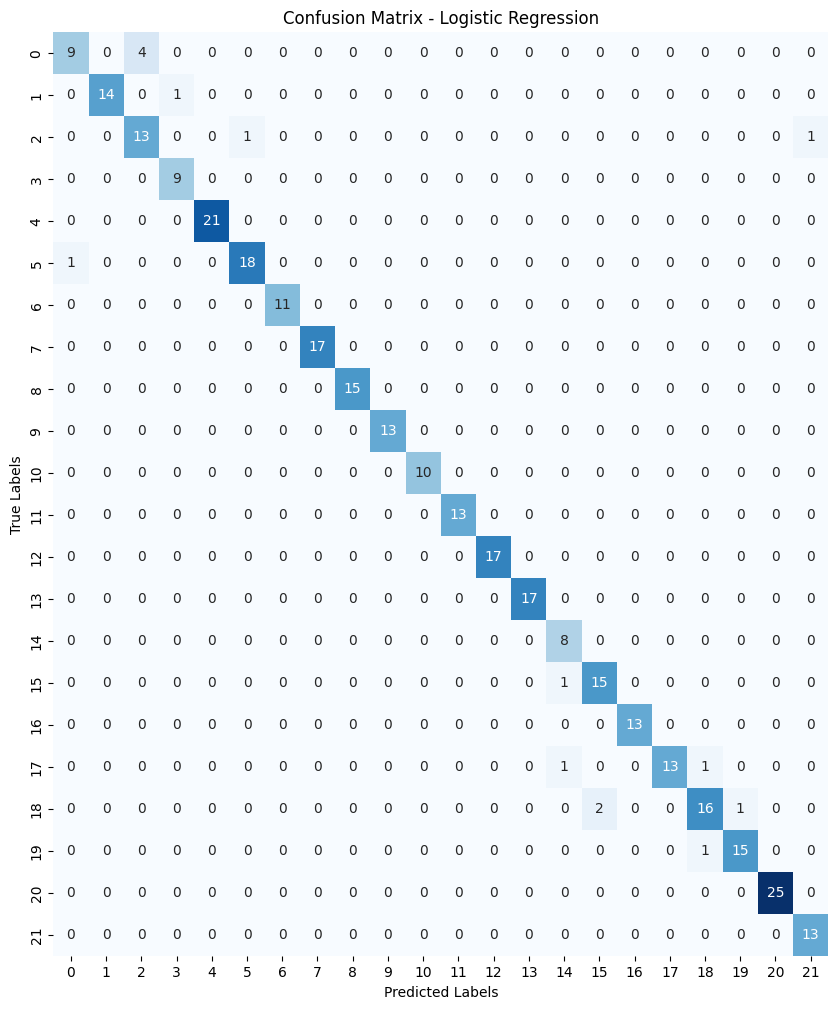

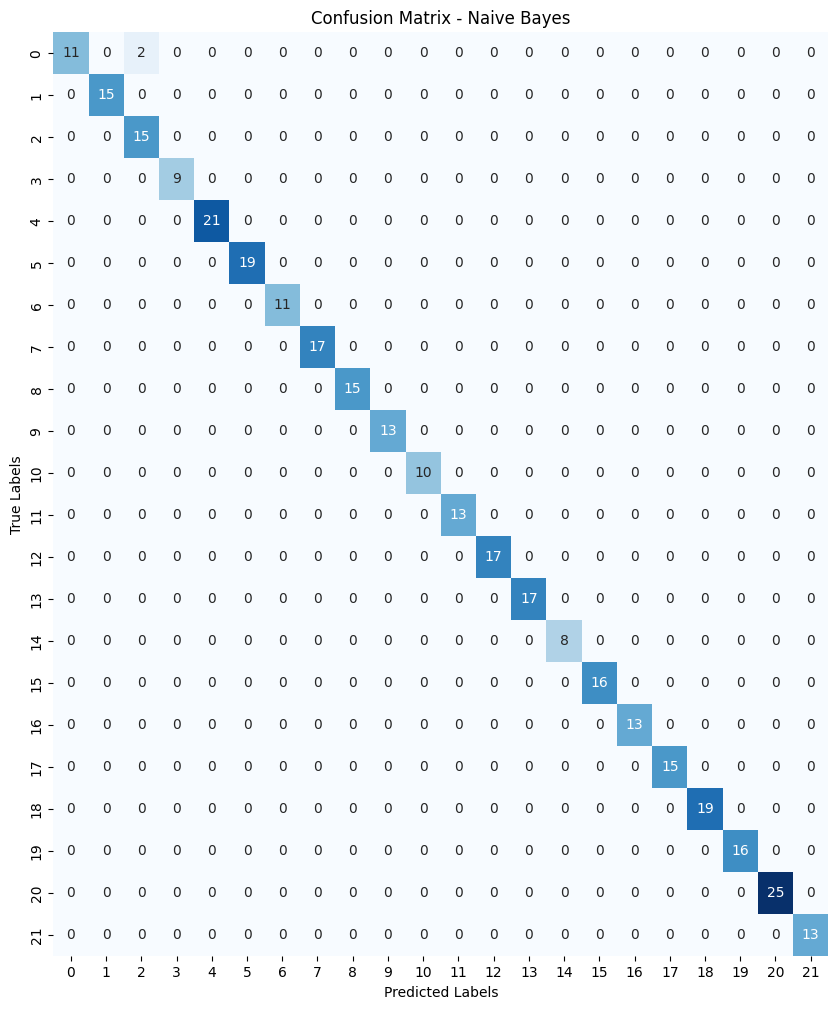

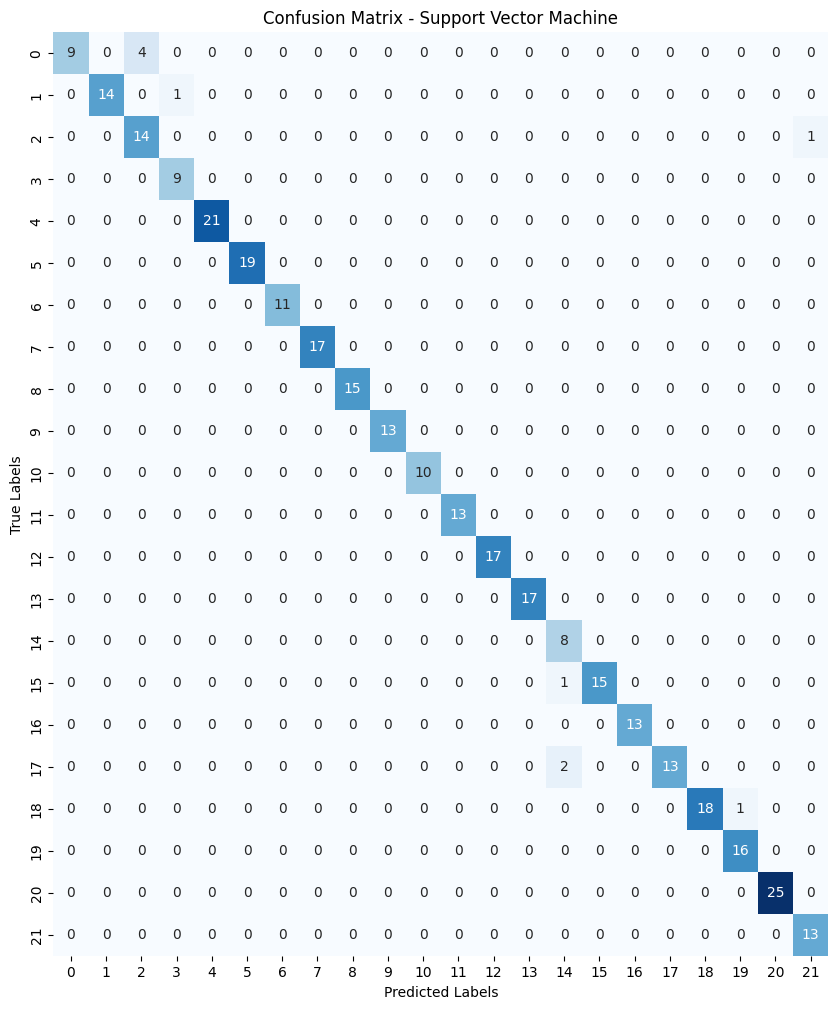

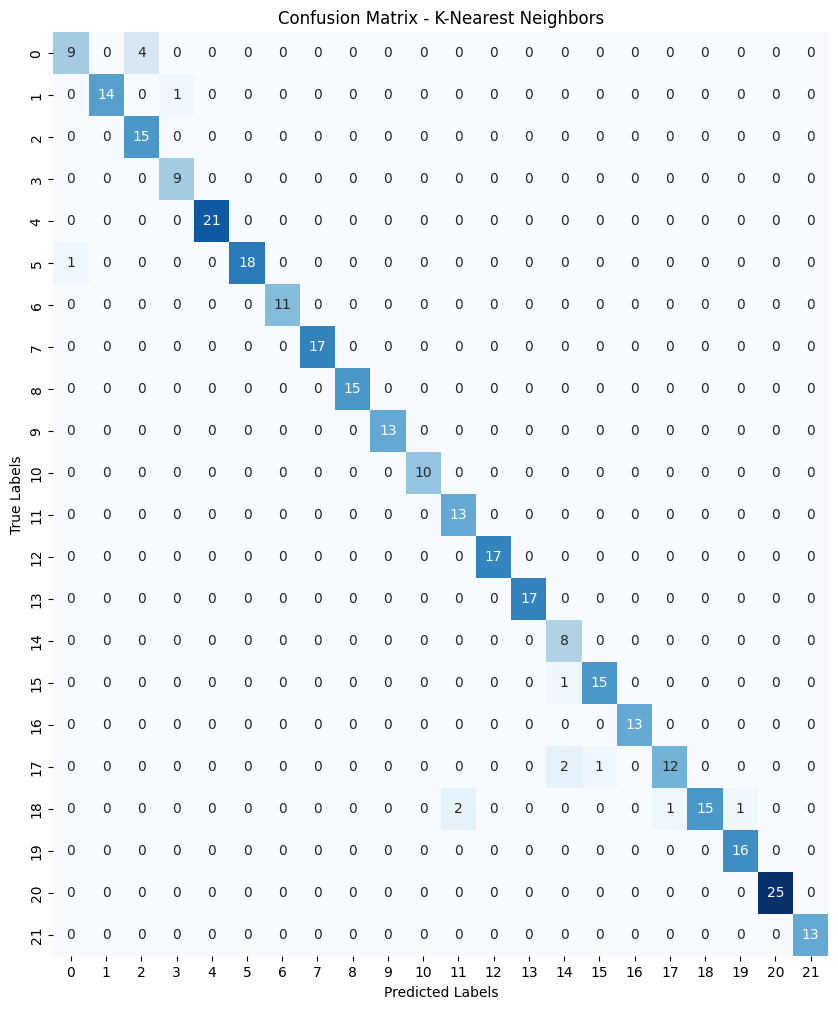

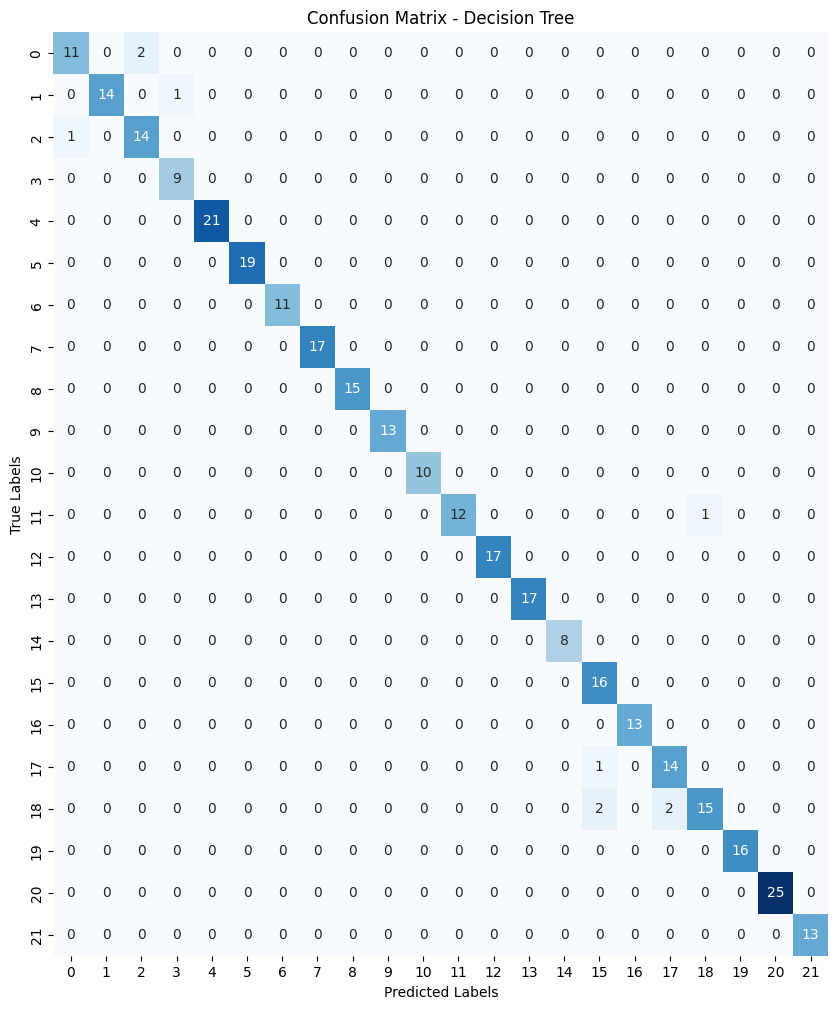

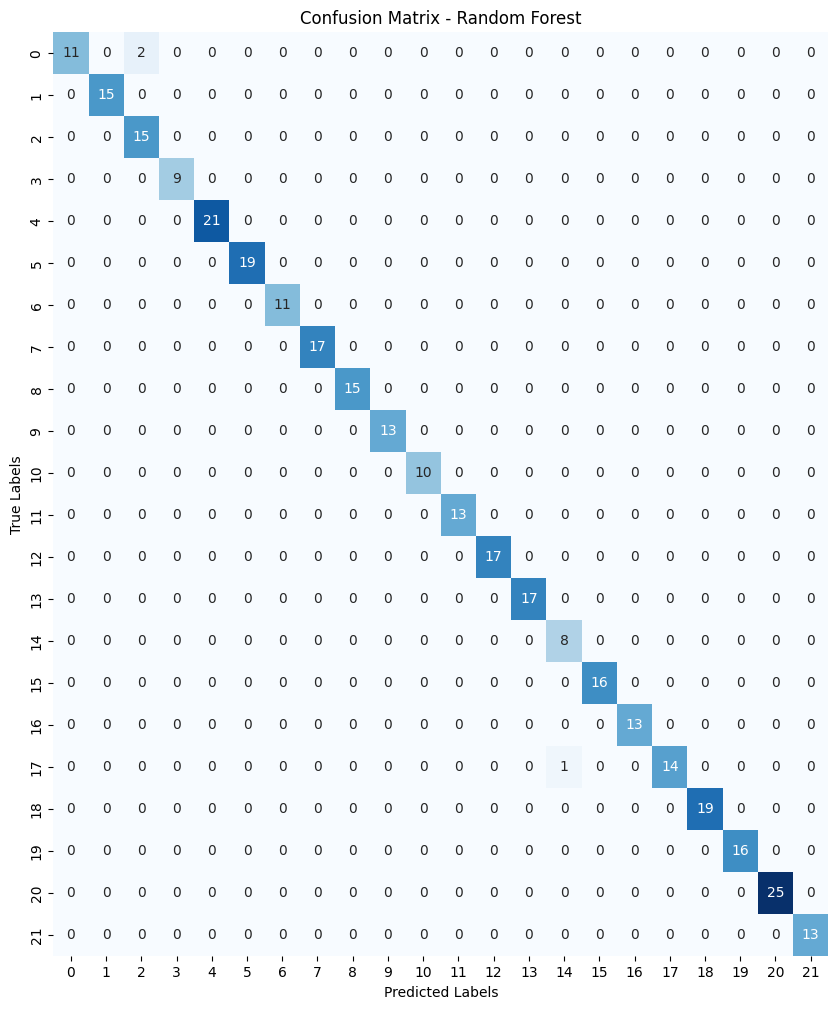

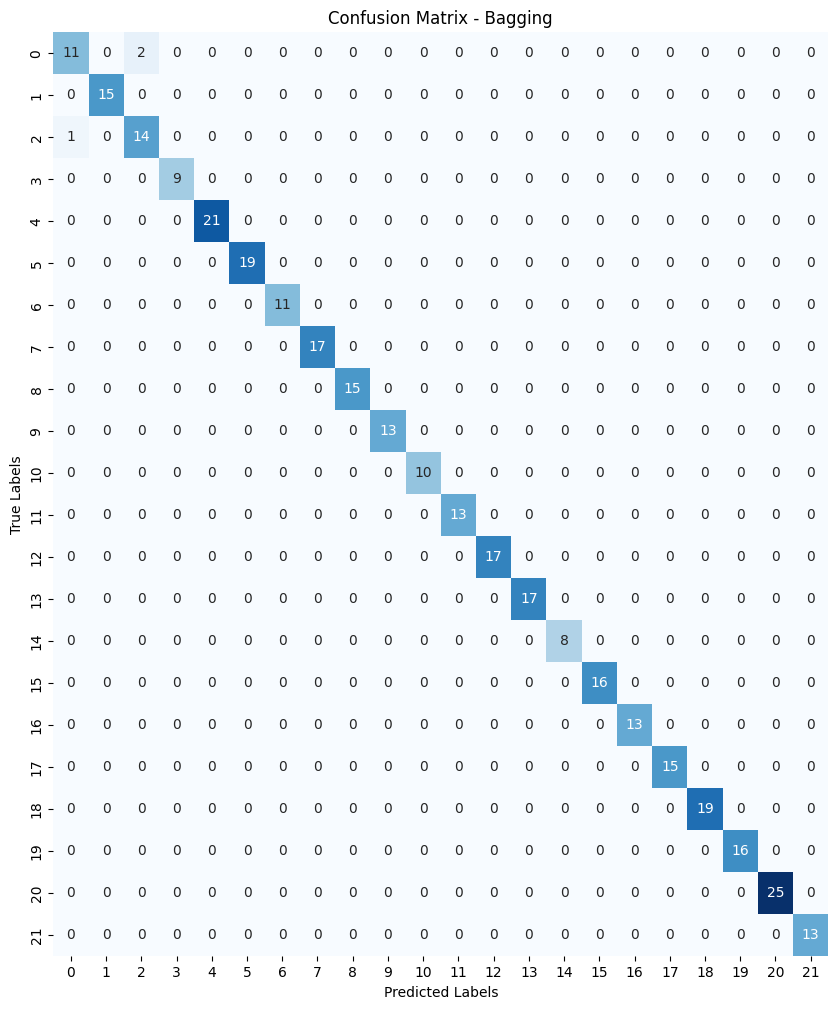

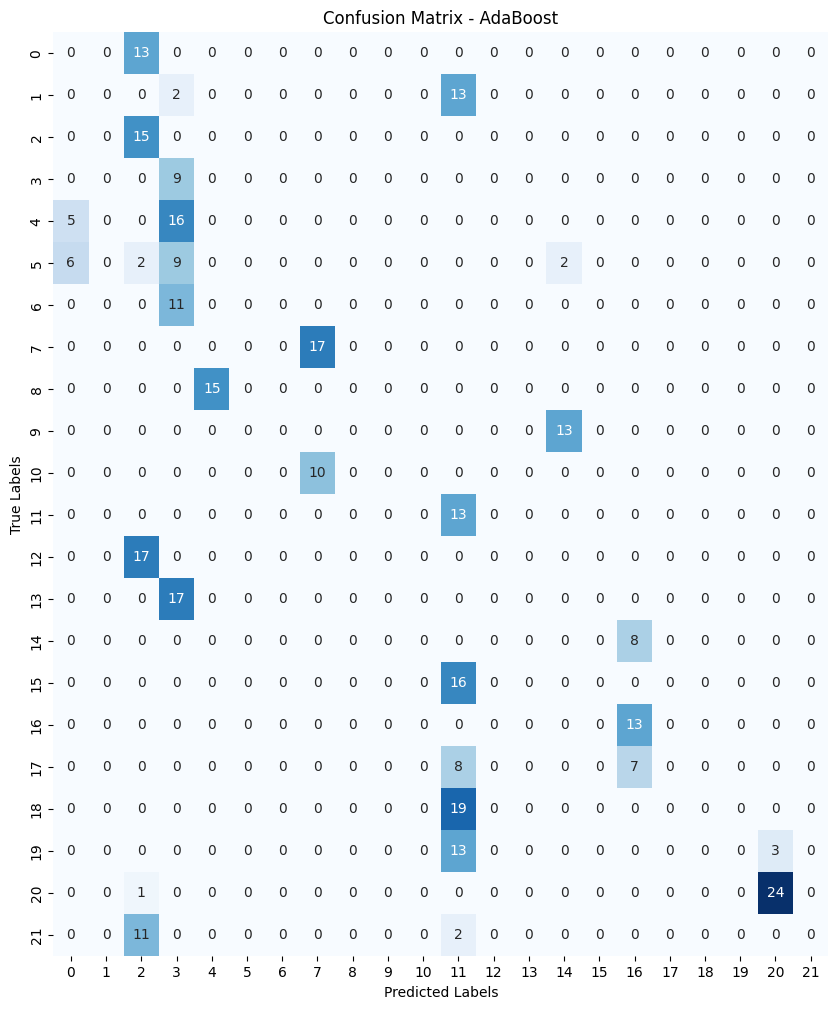

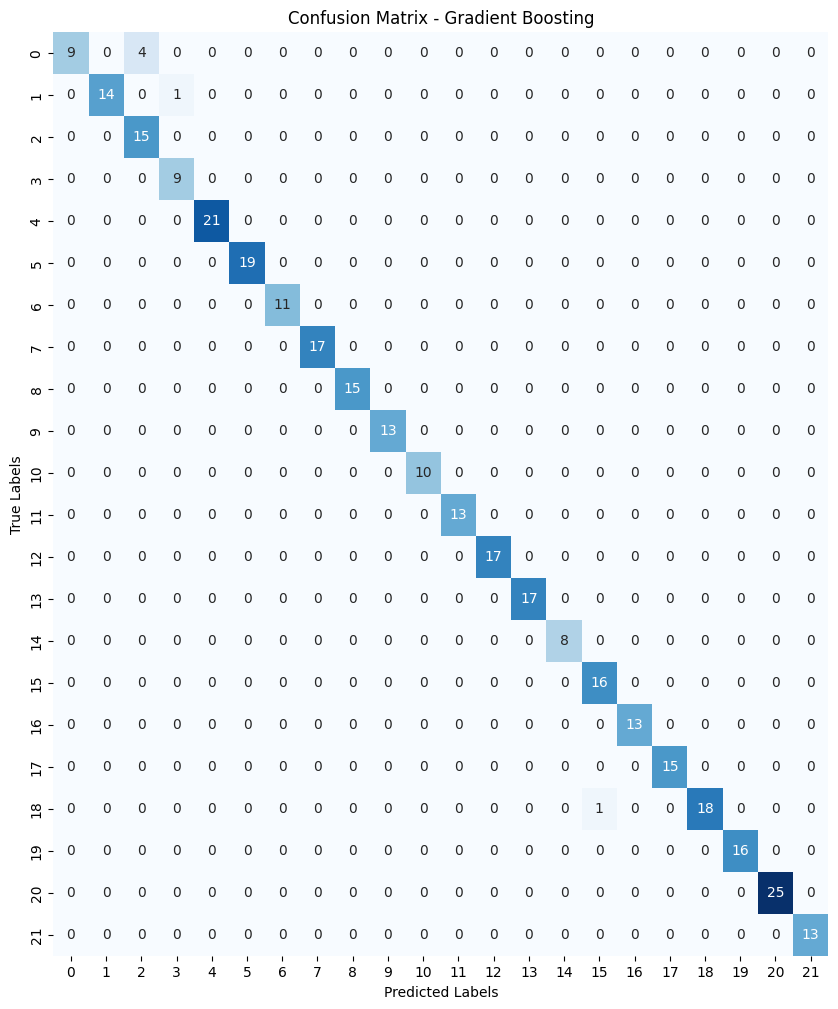

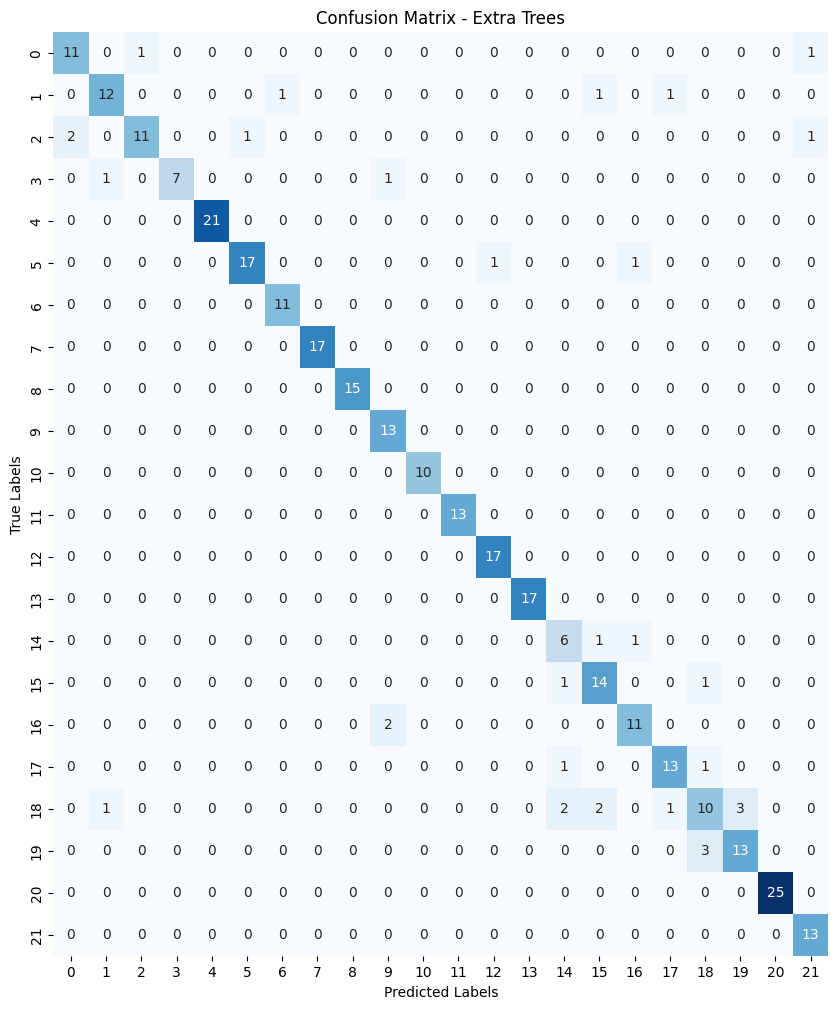

In [29]:
#confusion matrix for model in models

from sklearn.metrics import confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, y_pred)

    plt.figure(figsize=(10, 12))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [30]:
# # for models in adv_models

# for name, model in adv_models.items():
#     y_pred = model.predict(X_test)  # Assuming you're using the same X_test for adv_models
#     # If model is TabNet, use Y_test_new
#     if name == 'TabNet':
#         conf_matrix = confusion_matrix(Y_test_new, y_pred)  # Assuming Y_test_new for TabNet
#     else:
#         conf_matrix = confusion_matrix(Y_test_new, y_pred)  # Assuming Y_test_new for others

#     plt.figure(figsize=(10, 12))
#     sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('True Labels')
#     plt.title(f'Confusion Matrix - {name}')
#     plt.show()

----

> **Comparative Analysis of different Models and which models work best**

----

It includes:
1. Training Time Comparison
2. Memory Usage Evaluation
3. Peak memory Usage comparison
4. Log loss comparison
5. Model performance

----
> **Training Time comparsion**
----



In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import tracemalloc
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score


# Initialize dictionaries to store results
training_time_results = {}
memory_usage_results = {}
peak_memory_usage_results = {}
log_loss_results = {}
performance_results = {}

# Function to measure memory usage
def get_memory_usage():
    current, peak = tracemalloc.get_traced_memory()
    return current / 1024 / 1024, peak / 1024 / 1024  # in MB


from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelBinarizer

# Function to calculate log loss for multi-class classification
def calculate_log_loss(model, X_test, Y_test):
    """
    Calculates log loss for multi-class classification.
    Handles cases where model has predict_proba or not.

    Args:
        model: The trained model.
        X_test: Test data features.
        Y_test: True labels.

    Returns:
        Log loss.
    """
    try:
        y_pred_prob = model.predict_proba(X_test)
        loss = log_loss(Y_test, y_pred_prob)
    except AttributeError:
        # If predict_proba is not available, use one-hot encoding
        lb = LabelBinarizer()
        lb.fit(Y_test)  # Fit on true labels to get all classes
        y_true_onehot = lb.transform(Y_test)
        y_pred_onehot = lb.transform(model.predict(X_test))
        loss = log_loss(y_true_onehot, y_pred_onehot)

    return loss


# Store results for models in 'models'
for name, model in models.items():
    # Training time
    start_time = time.time()
    model.fit(X_train, Y_train_new)  # Using Y_train_new here
    training_time_results[name] = time.time() - start_time

    # Memory usage
    tracemalloc.start()
    model.predict(X_test)
    current_mem, peak_mem = get_memory_usage()
    tracemalloc.stop()
    memory_usage_results[name] = current_mem
    peak_memory_usage_results[name] = peak_mem

    # Log loss calculation using the new function
    log_loss_results[name] = calculate_log_loss(model, X_test, Y_test_new)  # Using Y_test_new here

    # Performance metrics
    y_pred = model.predict(X_test)
    precision = precision_score(Y_test_new, y_pred, average='weighted')  # Using Y_test_new here
    accuracy = accuracy_score(Y_test_new, y_pred)  # Using Y_test_new here
    f1 = f1_score(Y_test_new, y_pred, average='weighted')  # Using Y_test_new here
    recall = recall_score(Y_test_new, y_pred, average='weighted')  # Using Y_test_new here

    performance_results[name] = {
        'precision': precision,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall
    }

# Similarly, store results for models in 'adv_models'
for name, model in adv_models.items():
    # Training time
    start_time = time.time()

    if name == 'TabNet':
        model.fit(
            X_train, Y_train_new,
            eval_set=[(X_test, Y_test_new)],
            patience=5,
            max_epochs=100  # You might need to adjust this
        )
    else:
        model.fit(X_train, Y_train_new)  # Using Y_train_new here

    training_time_results[name] = time.time() - start_time

    # Memory usage
    tracemalloc.start()
    model.predict(X_test)
    current_mem, peak_mem = get_memory_usage()
    tracemalloc.stop()
    memory_usage_results[name] = current_mem
    peak_memory_usage_results[name] = peak_mem

    # Log loss calculation using the new function (adapted for adv_models)
    log_loss_results[name] = calculate_log_loss(model, X_test, Y_test_new)  # Using Y_test_new here

    # Performance metrics
    y_pred = model.predict(X_test)
    precision = precision_score(Y_test_new, y_pred, average='weighted')  # Using Y_test_new here
    accuracy = accuracy_score(Y_test_new, y_pred)  # Using Y_test_new here
    f1 = f1_score(Y_test_new, y_pred, average='weighted')  # Using Y_test_new here
    recall = recall_score(Y_test_new, y_pred, average='weighted')  # Using Y_test_new here


    performance_results[name] = {
        'precision': precision,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall
    }

# Create DataFrames for plotting
df_training_time = pd.DataFrame({'Model': list(training_time_results.keys()), 'Training Time (s)': list(training_time_results.values())})
df_memory_usage = pd.DataFrame({'Model': list(memory_usage_results.keys()), 'Memory Usage (MB)': list(memory_usage_results.values())})
df_peak_memory_usage = pd.DataFrame({'Model': list(peak_memory_usage_results.keys()), 'Peak Memory Usage (MB)': list(peak_memory_usage_results.values())})
df_log_loss = pd.DataFrame({'Model': list(log_loss_results.keys()), 'Log Loss': list(log_loss_results.values())})

# Bar charts for different metrics
def create_bar_chart(df, x_col, y_col, title, yscale='linear', color=None):
    plt.figure(figsize=(12, 6))
    plt.bar(df[x_col], df[y_col], color=color or ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'lime', 'pink', 'brown', 'gray', 'olive', 'teal'])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.yscale(yscale)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


Early stopping occurred at epoch 50 with best_epoch = 45 and best_val_0_accuracy = 0.89394


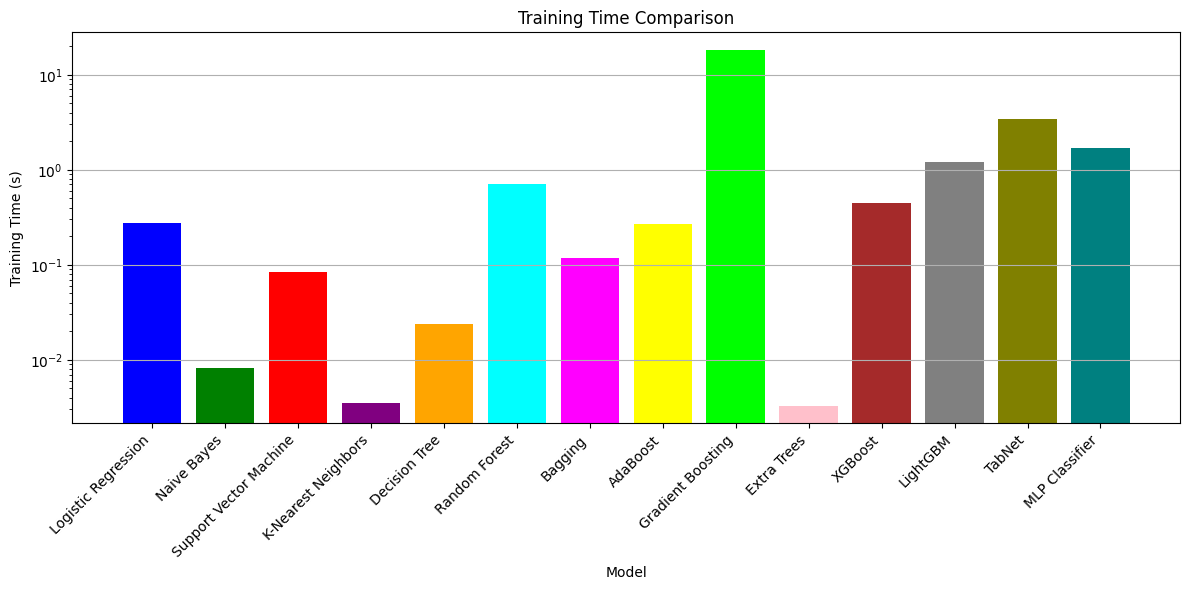

In [32]:
create_bar_chart(df_training_time, 'Model', 'Training Time (s)', 'Training Time Comparison', yscale='log')


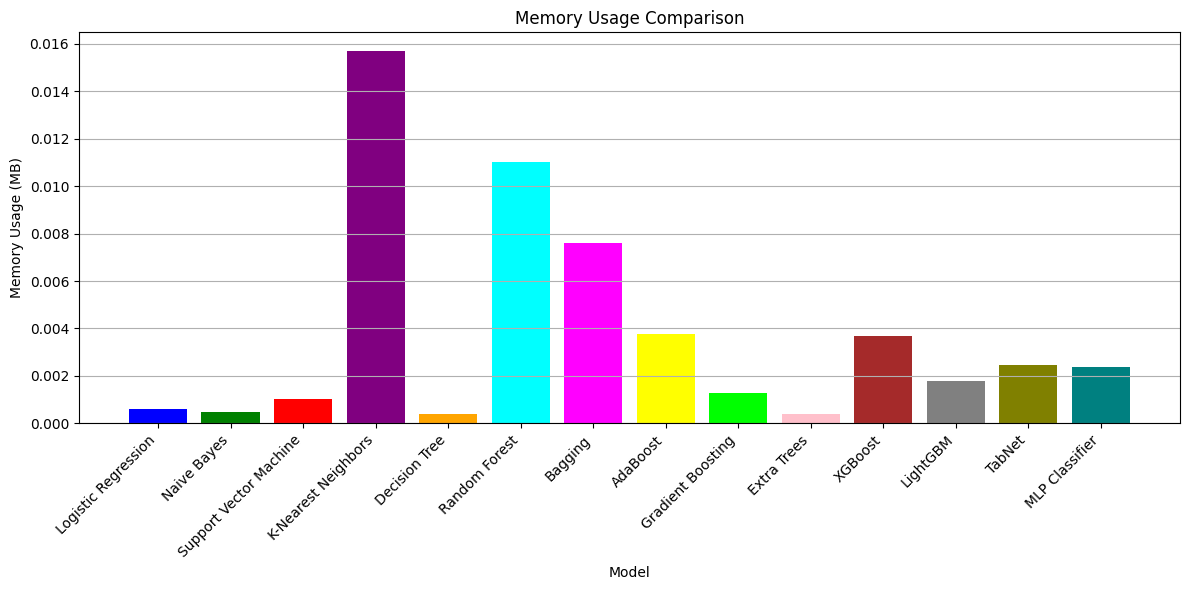

In [33]:
create_bar_chart(df_memory_usage, 'Model', 'Memory Usage (MB)', 'Memory Usage Comparison')

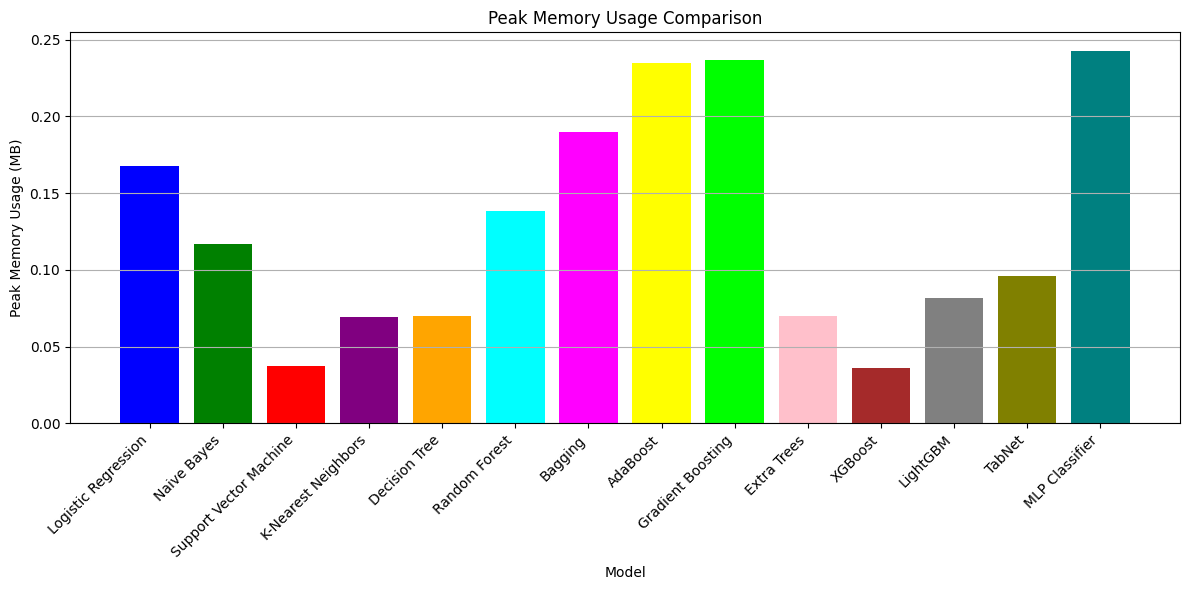

In [34]:

create_bar_chart(df_peak_memory_usage, 'Model', 'Peak Memory Usage (MB)', 'Peak Memory Usage Comparison')

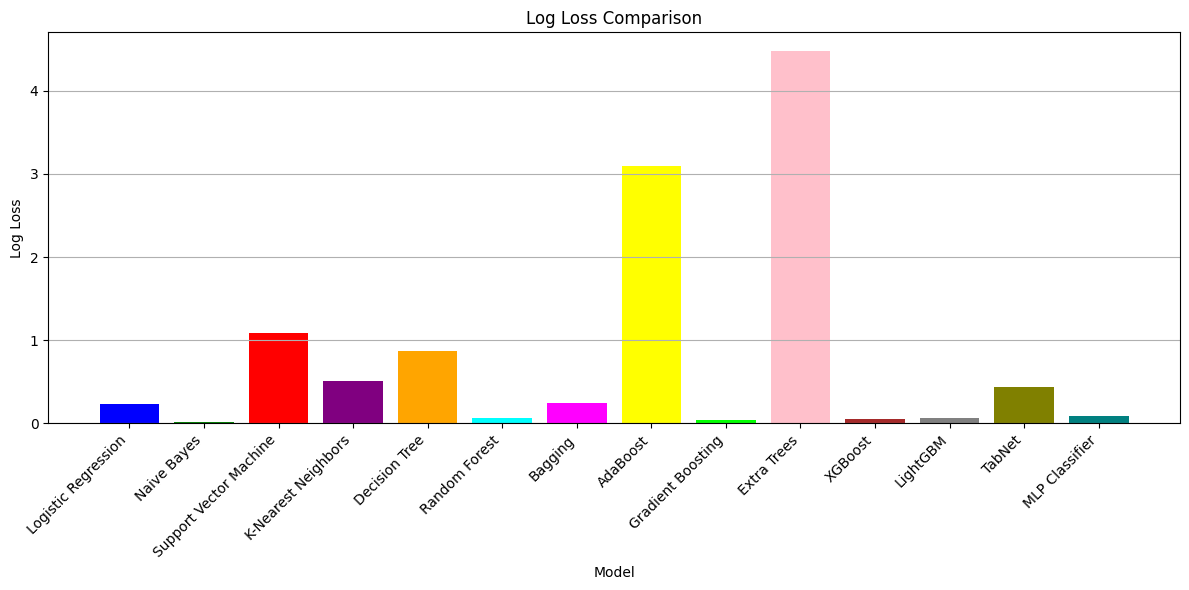

In [35]:
create_bar_chart(df_log_loss, 'Model', 'Log Loss', 'Log Loss Comparison')

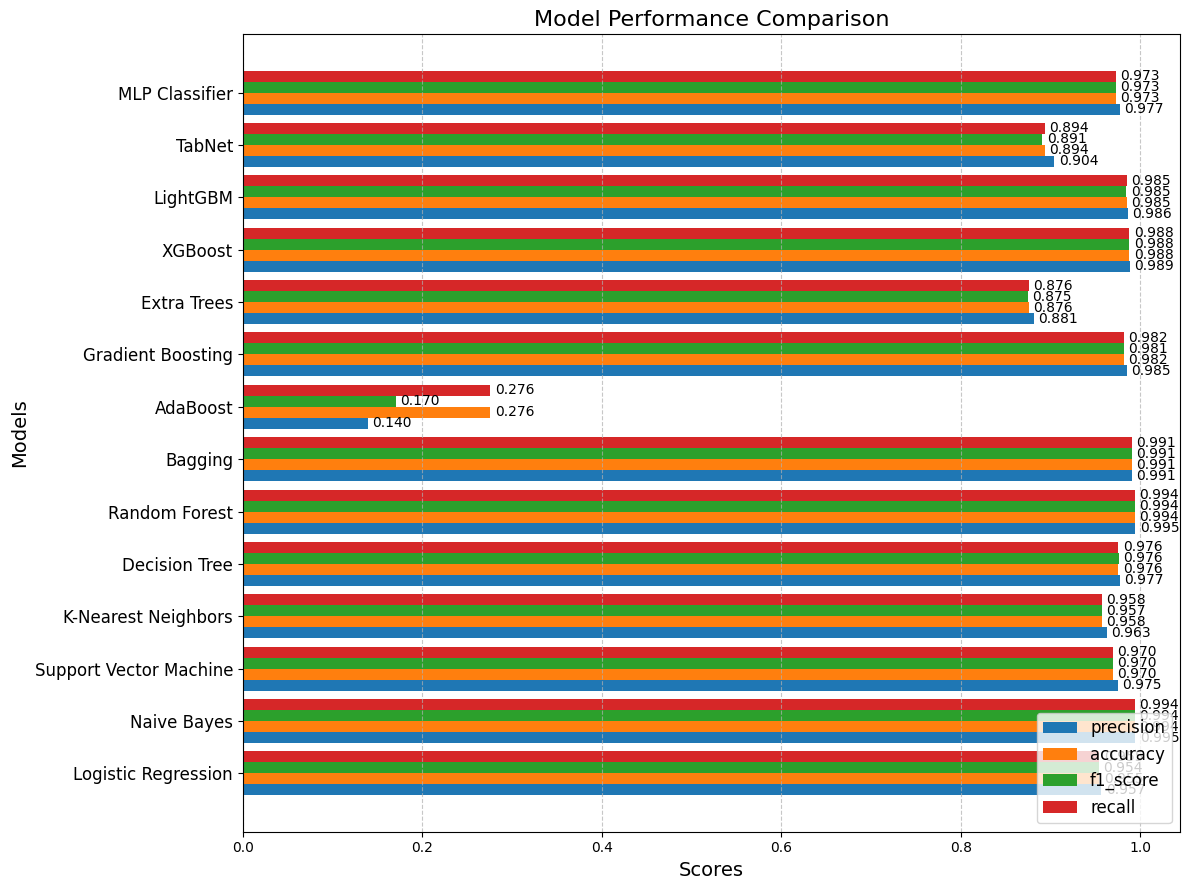

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming performance_results is already populated

# Create DataFrame for performance metrics
performance_df = pd.DataFrame(performance_results).T  # Transpose to have models as rows

# Plotting using barh for horizontal bars
fig, ax = plt.subplots(figsize=(12, 9))  # Increased figure height for better spacing

# Get model names and metrics
model_names = performance_df.index
metrics = performance_df.columns

# Increased bar width and adjusted positions for better spacing
bar_width = 0.21
index = np.arange(len(model_names))
bar_positions = [index + i * bar_width for i in range(len(metrics))]

# Create horizontal bars for each metric with adjusted positions and width
for i, metric in enumerate(metrics):
    ax.barh(bar_positions[i], performance_df[metric], height=bar_width, label=metric)

# Adjust layout
ax.set_title('Model Performance Comparison', fontsize=16)
ax.set_xlabel('Scores', fontsize=14)
ax.set_ylabel('Models', fontsize=14)
ax.set_yticks(index + bar_width * (len(metrics) - 1) / 2)  # Center y-tick labels
ax.set_yticklabels(model_names, fontsize=12)
ax.legend(loc='lower right', fontsize=12)  # Adjust legend location as needed
plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Grid on x-axis
plt.tight_layout()

# Add data labels to bars, adjusted for wider bars
for i, metric in enumerate(metrics):
    for j, value in enumerate(performance_df[metric]):
        ax.text(value + 0.005, index[j] + i * bar_width, f'{value:.3f}',
                va='center', fontsize=10, color='black')

plt.show()

 -----

 > **Peaking the best Model**

 ----

 Based on above analysis, it's clear that Naive Bayes is working best considering all aspects i.e's Training Time Comparison,
Memory Usage Evaluation,
Peak memory Usage comparison,
Log loss comparison and
Model performance.


**why Naive Bayes?**


**Simplicity and Efficiency**

Naive Bayes is renowned for its simplicity and efficiency in classification tasks. It operates on the principle of conditional probability and assumes independence between predictors. This characteristic is particularly advantageous in crop recommendation scenarios, where multiple factors such as soil composition, weather conditions, and more influence the selection of suitable crops. Naive Bayes efficiently estimates the likelihood of different crop types based on these factors.

**Handling Continuous Data**

Gaussian Naive Bayes (GaussianNB) is particularly effective when dealing with continuous data. It assumes that the continuous values associated with each feature are distributed according to a Gaussian distribution (normal distribution). This assumption aligns well with agricultural datasets where many features, such as temperature, rainfall, and pH levels, are continuous and can be assumed to follow a Gaussian distribution.

**Fast Model Training and Prediction**

Given the potentially large size of agricultural data, the speed of training and prediction is crucial. Naive Bayes provides a faster solution compared to more complex models, making it ideal for rapid analysis and real-time decision-making in crop recommendations. This efficiency is valuable for providing timely recommendations to farmers, enabling them to make informed decisions about their crops.

**Good Performance with Small Datasets**

Even with a smaller amount of data, Naive Bayes can perform quite well, making it a good choice for projects where the amount of data may be limited. This characteristic is advantageous in agricultural contexts where collecting large datasets might be challenging or time-consuming.

**Interpretability and Transparency**

Naive Bayes offers a degree of interpretability, allowing users to understand the reasoning behind its predictions. The model's probabilistic nature provides insights into the likelihood of different crop types based on the observed features. This transparency can be valuable for building trust in the recommendations and for understanding the factors influencing crop suitability.

**Suitability for Crop Recommendation**

The aforementioned characteristics make Naive Bayes a well-suited model for crop recommendation systems. Its simplicity, efficiency, ability to handle continuous data, and good performance with limited data align well with the requirements of agricultural applications. Additionally, its interpretability and transparency enhance the user's understanding and confidence in the recommendations.

In [37]:
# Instantiate the Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, Y_train)


GaussianNB()

In [38]:
import pickle
pickle_out = open('naive_bayes_model.pkl', 'wb')
pickle.dump(nb_classifier,pickle_out)
pickle_out.close()